In [2]:
#Please Run all cells in order and one by one to use each interactive plot separately.

In [9]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
#code in this cell is from https://mljar.com/blog/jupyter-notebook-hide-code/

# Localized particle in an infinite potential well.

This notebook's purpose is to visualize and exemplify :
  
The potential function in an infinite potential well.

$$\begin{align}
    V(x)=
    \begin{cases}
       \infty & \text{if}\ x<-L/2    \\
       0 & \text{if}\ -L/2<x<L/2  \\
       \infty & \text{if}\ L/2<x    \\
    \end{cases}
\end{align}$$

Using Schrödinger's equation, we can find the eigenfunctions and energy eigenvalues in this system:

$$
\Phi_n(x) = \sqrt{\frac{2}{L}} \sin\left( n\pi\frac{x+L/2}{L} \right) \hspace{1.5cm} E_n = \frac{n^2\pi^2ħ^2}{2 m L^2}
$$

The initial wave function is constant in $x_{0i}<x<x_{0f}$, and zero outside this bounds.

$$\begin{align}
\Psi(x,t=0) = 
        \begin{cases}
       0 & \text{if}\ x<x_{0i}    \\
       \frac{1}{\sqrt{x_{0f}-x_{0i}}} & \text{if}\ x_{0i}<x<x_{0f}  \\
       0 & \text{if}\ x_{0f}<x    \\
    \end{cases}
\end{align}$$

Then, we can express $Ψ(x, 0)$ as a superposition of eigenfunctions of the Hamiltonian and use this to calculate $Ψ(x, t)$.

$$
\Psi(x, t) = \sum_{n=1}^\infty a_n e^{-i \frac{E}{ħ} t} \Phi_n(x)     \\
a_n = \int^{L/2}_{-L/2} \Phi_n^*(x) \ \Psi(x,0) dx = \int_{x_{0i}}^{x_{0f}} \sqrt{\frac{2}{L}} \frac{1}{\sqrt{x_{0f}-x_{0i}}} \sin\left( n\pi \frac{x+L/2}{L} \right) = \frac{2}{n\pi}\sqrt{\frac{L}{2(x_{0f}-x_{0i})}} \left( \cos\left( n\pi\frac{x_{0i}+L/2}{L} \right) - \cos\left( n\pi\frac{x_{0f}+L/2}{L} \right) \right) 
$$


## 2D representation of $|ψ(x,0)|^2$
In the following figure we can see the evolution of the probability density function, using a finite sum of N eigenfunctions to approximate $\Psi$.

<IPython.core.display.Javascript object>


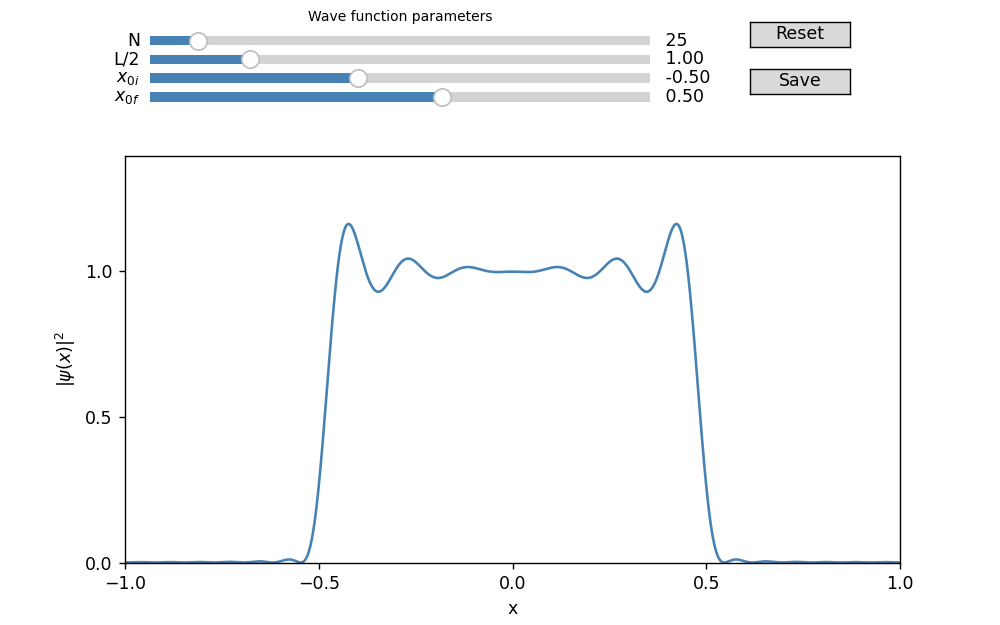

In [14]:
import numpy as np
from numpy import pi, sin, cos, exp, sqrt, log
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#We activate the interactive mode in order to display animations
%matplotlib notebook

#Note that in this code a = L/2, b = x_{0i} and c = x_{0f}

#We calculate the time-dependent wave function:
def Psi1(X,t):
    Psi1 = sum(2*(cos(n*pi*(b+a)/(2*a)) - cos(n*pi*(c+a)/(2*a)))/(n*pi)*sqrt(a/(c-b))*sin(n*pi*(X+a)/(2*a))/sqrt(a)* \
               exp(-I*(n*pi/a)**2/8*t) for n in range(1,N+1))
    return Psi1


#Program constants
I = complex(0,1)


# -----------------------------------------------------------------------------------------------

def find_lims(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of Y
    ymax = np.max(Y)
    ymin = np.min(Y)
    
    if(ymax >= 0 and ymin >= 0):
        lim_inf, lim_sup = ymin*0.8, ymax*1.2
    elif(ymax > 0 and ymin < 0):
        lim_inf, lim_sup = ymin*1.2, ymax*1.2
    elif(ymax < 0 and ymin < 0):
        lim_inf, lim_sup = ymin*1.2, ymax*0.8
    
    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def interactive_rho_x(Psi):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have q,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------
    
    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_N = fig.add_axes([0.15, 0.92, 0.5, 0.03])
        ax_N.set_title('Wave function parameters',fontsize=8)
        ax_a = fig.add_axes([0.15, 0.89, 0.5, 0.03])
        ax_b = fig.add_axes([0.15, 0.86, 0.5, 0.03])
        ax_c = fig.add_axes([0.15, 0.83, 0.5, 0.03])
        
        #We create the sliders as widgets
        #The initial values are the ones preset in the maoi
        s_N = Slider(ax=ax_N, label='N', valmin=1, valmax=250, valinit=N, valstep = 1, valfmt=' %0.0f',facecolor='steelblue')
        s_a = Slider(ax=ax_a, label='L/2', valmin=0.5, valmax=3, valinit=a, valfmt=' %1.2f ', facecolor='steelblue')
        s_b = Slider(ax=ax_b, label='$x_{0i}$', valmin=-3, valmax=3, valinit=b, valfmt=' %1.2f ', facecolor='steelblue')
        s_c = Slider(ax=ax_c, label='$x_{0f}$', valmin=-3, valmax=3, valinit=c, valfmt=' %1.2f ', facecolor='steelblue')
       
        #We return all axes and sliders created in the function
        return ax_N, ax_a, ax_b, ax_c, s_N, s_a, s_b, s_c
    
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.75,0.925,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            s_N.reset()
            s_a.reset()
            s_b.reset()
            s_c.reset()
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.75,0.85,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            plt.savefig('Localized_rhox.png')
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_save
    
    def initialize_main_plot():
    #This function is used to initialize the main plot axis, and the details of this initialization must be changed here
        #We represent rho_x at t=0, as it is an invariant for eigenfuctions
        #We compute the needed variables to initialize
        X = np.linspace(x0,xf,1000)
        rho_x = np.abs(Psi(X,t))**2 #Note that this variable is not exactly the probability density, as Psi is not normalized

        #We plot the preset distribution
        line, = ax.plot(X,rho_x,lw=1.5,color = 'steelblue')
        line.set_data(X,rho_x)

        #We add axis labels and limits to the initial figure
        ax.set_xlim(x0,xf)   
        ymin, ymax = find_lims(rho_x)
        ax.set_ylim(ymin,ymax)
        ax.set_xlabel('x')
        ax.set_ylabel('$|ψ(x)|^2$')
        
    #   We avoid too many ticks at the axes
        plt.locator_params(nbins=4)
        
        return ax, line
    
    def actualize_main_plot():
    #This function is used to initialize the main plot axis, and the details of this initialization must be changed here
        #We calculate the new data and actualize the represented line
        X = np.linspace(x0,xf,1000)
        rho_x = np.abs(Psi(X,t))**2
        line.set_data(X,rho_x)
        
        #We compute and apply the new limits in the main figure
        ymin, ymax = find_lims(rho_x)
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        return ax, line
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global N,a,b,c,dt
        global x0,xf,ymin,ymax
        global ax
        N = round(s_N.val)
        a = s_a.val
        b = s_b.val
        c = s_c.val
        
        x0 = -a
        xf = a   
        
        
        #It is necessary that -a < b < c < a
        #To avoid non valid simulations that might be confusing, we dinamically change the slider's limits
        s_b.valmin = -a
        s_b.valmax = c - 0.01
        s_c.valmin = b + 0.01
        s_c.valmax = a
        
        #We actualize the current slider values if they are out of bounds and give priority to the n and a values
        if b < s_b.valmin:
            b = s_b.valmin
            s_b.set_val(b)
        if c > s_c.valmax:
            c = s_c.valmax
            s_c.set_val(c)
            
        if b > s_b.valmax:
            b = s_b.valmax
            s_b.set_val(b)
        if c < s_c.valmin:
            c = s_c.valmin
            s_c.set_val(c)
            
        #We actualize the visible limit in the axes of the sliders
        s_b.ax.set_xlim(s_b.valmin,s_b.valmax)
        s_c.ax.set_xlim(s_c.valmin,s_c.valmax)
        
        
        #We actualize the main plot
        ax, line = actualize_main_plot()
        
        #We actualize the annotations
        En_annotation, Pot_annotation = make_annotations(actualize=True)

        plt.show()
        return
    
        # ------------------------------------------------------------
  
    #Function's Main Program
    #We choose the preset wave function and figure parameters
    global N,a,b,c
    global x0,xf,t
    N = 25
    a = 1
    b = -0.5
    c = 0.5

    #We initialize figure's variables
    t = 0
    x0 = -a
    xf = a
    
    #We define figure's axes
    fig, ax = plt.subplots(figsize=(8,5))
    fig.subplots_adjust(bottom = 0.1, top = 0.75)
    
    #We initialize the main plot (its initial representation and graphic details)
    ax, line = initialize_main_plot()
    
    #We generate the two buttons
    b_reset, b_save = generate_buttons()
    
    #We create the desired sliders
    ax_N, ax_a, ax_b, ax_c, s_N, s_a, s_b, s_c = create_sliders()
    
    #We call the update function when any slider is used
    s_N.on_changed(update)
    s_a.on_changed(update)
    s_b.on_changed(update)
    s_c.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the figure and buttons after showing them, referencing them 
    # in the main program is needed for the interactive plot to work properly
    return fig, b_reset, b_save

# -----------------------------------------------------------------------------------------------

fig, b_reset, b_save = interactive_rho_x(Psi1)

## 2D representation of $|ψ(x,t)|^2$
In the following figure we can see the evolution of the probability density function, using a finite sum of N eigenfunctions to approximate $\Psi$.

<IPython.core.display.Javascript object>


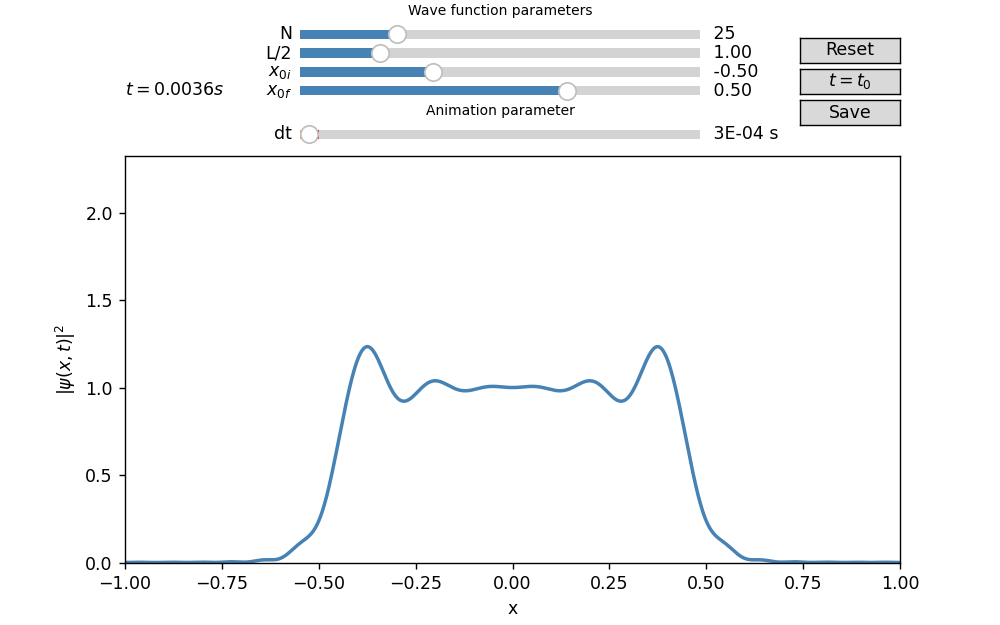

In [16]:
import numpy as np
from numpy import pi, sin, cos, exp, sqrt, log
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#We activate the interactive mode in order to display animations
%matplotlib notebook

# -----------------------------------------------------------------------------------------------

def find_lims(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of Y
    y_max = np.max(Y)
    y_min = np.min(Y)
    
    if(y_max >= 0 and y_min >= 0):
        lim_inf, lim_sup = y_min*0.8, y_max*2
    elif(ymax > 0 and ymin < 0):
        lim_inf, lim_sup = y_min*2, y_max*2
    elif(ymax < 0 and ymin < 0):
        lim_inf, lim_sup = y_min*2, y_max*0.8
    
    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_rhox_2D(Psi,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_N = fig.add_axes([0.3, 0.93, 0.4, 0.03])
        ax_N.set_title('Wave function parameters',fontsize=8)
        ax_a = fig.add_axes([0.3, 0.90, 0.4, 0.03])
        ax_b = fig.add_axes([0.3, 0.87, 0.4, 0.03])
        ax_c = fig.add_axes([0.3, 0.84, 0.4, 0.03])
        
        ax_dt = fig.add_axes([0.3, 0.77, 0.4, 0.03])
        ax_dt.set_title('Animation parameter',fontsize=8)

        #We create the sliders as widgets
        #The initial values are the ones preset in the maoi
        s_N = Slider(ax=ax_N, label='N', valmin=1, valmax=100, valinit=N, valstep = 1, valfmt=' %0.0f',facecolor='steelblue')
        s_a = Slider(ax=ax_a, label='L/2', valmin=0.5, valmax=3, valinit=a, valfmt=' %1.2f ', facecolor='steelblue')
        s_b = Slider(ax=ax_b, label='$x_{0i}$', valmin=-3, valmax=3, valinit=b, valfmt=' %1.2f ', facecolor='steelblue')
        s_c = Slider(ax=ax_c, label='$x_{0f}$', valmin=-3, valmax=3, valinit=c, valfmt=' %1.2f ', facecolor='steelblue')
        s_dt = Slider(ax=ax_dt,label='dt',valmin=0.00005,valmax=0.01,valinit=dt,valfmt=' %.E s',facecolor='orange')            
       
        #We return all axes and sliders created in the function
        return ax_N, ax_a, ax_b, ax_c, ax_dt, s_N, s_a, s_b, s_c, s_dt
    
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.8,0.90,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            global t
            t = t0
            s_N.reset()
            s_a.reset()
            s_b.reset()
            s_c.reset()
            s_dt.reset()
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        #We create an axis for the reset button and define its widget
        ax_restart = fig.add_axes([0.8,0.85,0.1,0.04])
        b_restart = Button(ax_restart, '$t = t_0$', hovercolor='0.975')
        
        def restart(event):
        #Resets all sliders and time
            global t
            t = t0 - dt
            return
        #We call the reset function when the reset button is used
        b_restart.on_clicked(restart)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.80,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Localized_animated_rhox.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_restart, b_save
        
        
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0
        
#       We add some graphic details
        ax.set_xlabel('x')
        ax.set_ylabel('$|ψ(x,t)|^2$')
        ax.axhline(y = 0,color = 'black',linestyle = '--',lw = 0.5)
        
#       We compute the initial information
        X = np.linspace(x0,xf,1000)
        Y = np.abs(Psi(X,t0))**2
        
#       We use the initial function limits
        ymin, ymax = find_lims(Y)
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
#       We represent both functions
        line1.set_data(X, Y)
    
        #We return all line functions
        return line1
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame
        global t
        t = t + dt
        X = np.linspace(x0,xf,1000)
        Y = np.abs(Psi(X,t))**2

#       We actualize the time annotation
        time_annotation.set_text("$t = {:10.4f} s $".format(t))

#       We represent both functions
        line1.set_data(X, Y)
        
        #We return all line functions
        return line1
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global N,a,b,c,dt
        global x0,xf,ymin,ymax
        N = round(s_N.val)
        a = s_a.val
        b = s_b.val
        c = s_c.val
        dt = s_dt.val
        
        x0 = -a
        xf = a        
        
        #It is necessary that -a < b < c < a
        #To avoid non valid simulations that might be confusing, we dinamically change the slider's limits
        s_b.valmin = -a
        s_b.valmax = c - 0.001
        s_c.valmin = b + 0.001
        s_c.valmax = a

        #We actualize the current slider values if they are out of bounds and give priority to the n and a values
        if b < s_b.valmin:
            b = s_b.valmin
            s_b.set_val(b)
        if c > s_c.valmax:
            c = s_c.valmax
            s_c.set_val(c)
            
        if b > s_b.valmax:
            b = s_b.valmax
            s_b.set_val(c)
        if c < s_c.valmin:
            c = s_c.valmin
            s_c.set_val(b)
            
        #We actualize the visible limit in the axes of the sliders
        s_b.ax.set_xlim(s_b.valmin,s_b.valmax)
        s_c.ax.set_xlim(s_c.valmin,s_c.valmax)
        
        #We recalculate points in the x axis
        X = np.linspace(x0,xf,1000)
        
        #We compute and apply the new limits in the main figure
        Y = np.abs(Psi(X,t0))**2
        ymin, ymax = find_lims(Y)
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
        plt.show()
        return
    
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global N,a,b,c
    global x0,xf,t,dt
    N = 25
    a = 1
    b = -0.5
    c = 0.5

    #We initialize figure's variables
    t = t0
    dt = 0.0005
    x0 = -a
    xf = a
    
    #We define figure's axes and main line
    fig, ax = plt.subplots(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.1, top = 0.75)
    line1, = ax.plot([], [], lw=2, label = '$|ψ(x,t)|^2$', color = 'steelblue')
    
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
    
    #We create the desired sliders
    ax_N, ax_a, ax_b, ax_c, ax_dt, s_N, s_a, s_b, s_c, s_dt = create_sliders()
    
    #We generate the two buttons
    b_reset, b_restart, b_save = generate_buttons()   
    
    #We generate the annotations
    time_annotation = ax.annotate("$t = {:10.3f} s $".format(t), xy=(0, 1.15), xycoords="axes fraction")
    
    #We call the update function when any slider is used
    s_N.on_changed(update)
    s_a.on_changed(update)
    s_b.on_changed(update)
    s_c.on_changed(update)
    s_dt.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_restart, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_restart, b_save = animate_interactive_rhox_2D(Psi1,t0,total_frames)

## 2D representation of $ψ(x,t)$
In the following figure we can see the evolution of the real and imaginary parts of the time dependent wave function, using a finite sum of N eigenfunctions to approximate $\Psi$.

<IPython.core.display.Javascript object>


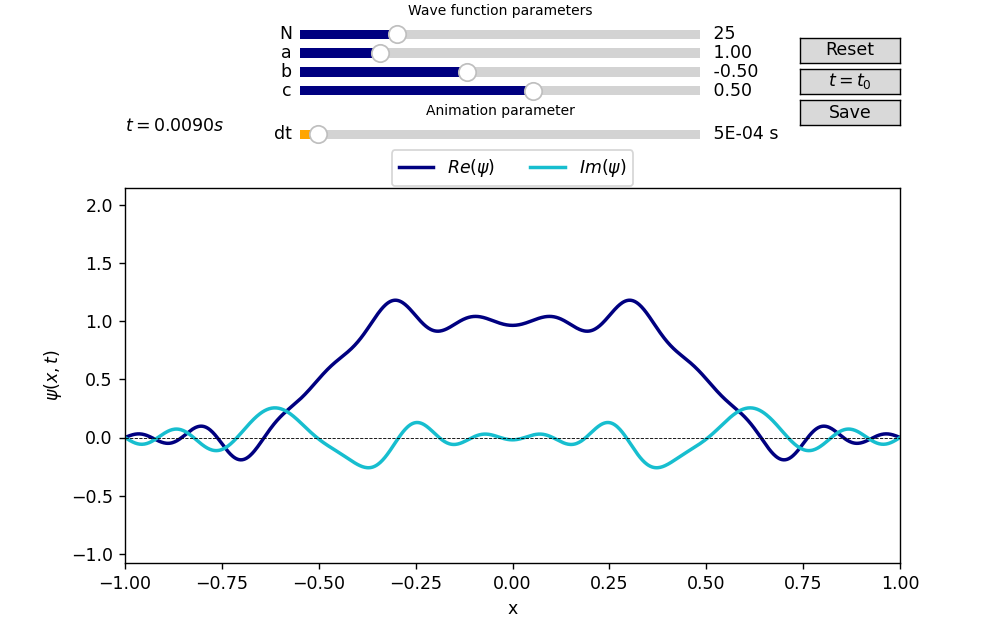

In [10]:
#We enable the interactive mode for the next plot
%matplotlib notebook

# -----------------------------------------------------------------------------------------------

def find_lims_abs(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of the imaginary and real part of Y (wavefunction array)
    ymax = np.max(Y)
    ymin = -ymax/2
    lim_inf, lim_sup = ymin*2, ymax*2

    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_Psi_2D(Psi,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_N = fig.add_axes([0.3, 0.93, 0.4, 0.03])
        ax_N.set_title('Wave function parameters',fontsize=8)
        ax_a = fig.add_axes([0.3, 0.90, 0.4, 0.03])
        ax_b = fig.add_axes([0.3, 0.87, 0.4, 0.03])
        ax_c = fig.add_axes([0.3, 0.84, 0.4, 0.03])
        
        ax_dt = fig.add_axes([0.3, 0.77, 0.4, 0.03])
        ax_dt.set_title('Animation parameter',fontsize=8)

        #We create the sliders as widgets
        #The initial values are the ones preset in the maoi
        s_N = Slider(ax=ax_N, label='N', valmin=1, valmax=100, valinit=N, valstep = 1, valfmt=' %0.0f',facecolor='navy')
        s_a = Slider(ax=ax_a, label='a', valmin=0.5, valmax=3, valinit=a, valfmt=' %1.2f ', facecolor='navy')
        s_b = Slider(ax=ax_b, label='b', valmin=-3, valmax=3, valinit=b, valfmt=' %1.2f ', facecolor='navy')
        s_c = Slider(ax=ax_c, label='c', valmin=-3, valmax=3, valinit=c, valfmt=' %1.2f ', facecolor='navy')
        s_dt = Slider(ax=ax_dt,label='dt',valmin=0.00005,valmax=0.01,valinit=dt,valfmt=' %.E s',facecolor='orange')            
       
        #We return all axes and sliders created in the function
        return ax_N, ax_a, ax_b, ax_c, ax_dt, s_N, s_a, s_b, s_c, s_dt
    
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.8,0.90,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            global t
            t = t0
            s_N.reset()
            s_a.reset()
            s_b.reset()
            s_c.reset()
            s_dt.reset()
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        #We create an axis for the reset button and define its widget
        ax_restart = fig.add_axes([0.8,0.85,0.1,0.04])
        b_restart = Button(ax_restart, '$t = t_0$', hovercolor='0.975')
        
        def restart(event):
        #Resets all sliders and time
            global t
            t = t0 - dt
            return
        #We call the reset function when the reset button is used
        b_restart.on_clicked(restart)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.80,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Localized_animated_rhox.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_restart, b_save
    
    
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0
        
#       We add some graphic details
        ax.set_xlabel('x')
        ax.set_ylabel('$ψ(x,t)$')
        ax.legend(bbox_to_anchor=(0., 1.02, 1.,.102),loc = 'upper center',ncol=2)
        ax.axhline(y = 0,color = 'black',linestyle = '--',lw = 0.5)
        
#       We compute the initial information
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t0)
        
#       We use the initial function limits
        ymin, ymax = find_lims_abs(np.abs(Y))
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
#       We represent both functions
        line1.set_data(X, np.real(Y))
        line2.set_data(X, np.imag(Y))  
        
        #We return all line functions
        return line1, line2
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame
        global t,X,Y
        t = t + dt
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t)

#       We actualize the time and x2 annotations
        time_annotation.set_text("$t = {:10.4f} s $".format(t))

#       We represent both functions
        line1.set_data(X, np.real(Y))
        line2.set_data(X, np.imag(Y))      
        
        #We return all line functions
        return line1, line2
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global N,a,b,c,dt
        global x0,xf,ymin,ymax
        N = round(s_N.val)
        a = s_a.val
        b = s_b.val
        c = s_c.val
        dt = s_dt.val
        
        x0 = -a
        xf = a        
        

        #We compute and apply the new limits in the main figure
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t0)
        ymin, ymax = find_lims_abs(np.abs(Y))
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
                
        plt.show()
        return
    
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global N,a,b,c
    global x0,xf,t,dt
    N = 25
    a = 1
    b = -0.5
    c = 0.5

    #We initialize figure's variables
    t = t0
    dt = 0.0005
    x0 = -a
    xf = a
    
    #We define figure's axes and main line
    fig, ax = plt.subplots(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.1, top = 0.70)
    line1, = ax.plot([], [], lw=2, label = '$Re(ψ)$', color = 'navy')
    line2, = ax.plot([], [], lw=2, label = '$Im(ψ)$', color = 'tab:cyan')    
    
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
    
    #We create the desired sliders
    ax_N, ax_a, ax_b, ax_c, ax_dt, s_N, s_a, s_b, s_c, s_dt = create_sliders()
    
    #We generate the two buttons
    b_reset, b_restart, b_save = generate_buttons()   
    
    #We generate the annotations
    time_annotation = ax.annotate("$t = {:10.3f} s $".format(t), xy=(0, 1.15), xycoords="axes fraction")
    
    #We call the update function when any slider is used
    s_N.on_changed(update)
    s_a.on_changed(update)
    s_dt.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_restart, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_restart, b_save = animate_interactive_Psi_2D(Psi1,t0,total_frames)

## Limit case for $\Delta x \rightarrow 0$
Although a wavefunction $\Psi_0(x) = \delta(x)$ is not normalizable, we can try to approximate this initial distribution with a sum of N eigenstates and re-normalize the result to get an approximation of the wavefunction's time evolution.

$$
\Psi(x,t=0) = \delta(x)
$$

Then, we can express $Ψ(x, 0)$ as a superposition of eigenfunctions of the Hamiltonian and use this to calculate $Ψ(x, t)$.

$$
\Psi(x, t) = \sum_{n=1}^\infty a_n e^{-i \frac{E}{ħ} t} \Phi_n(x)     \\
a_n = \int^a_{-a} \Phi_n^*(x) \ \Psi(x,0) dx = \int^a_{-a} \Phi_n^*(x) \ \delta(x,0) = \Phi_n^*(0) =  \frac{1}{\sqrt{a}} \sin\left( n\frac{\pi}{2} \right)
$$

To normalize a finite sum of the projection of $N$ eigenstates, and as $sin\left(n\frac{\pi}{2}\right) = 0$ if n is even, we must divide the obtained approximation by $\sqrt{\frac{N}{2}}$ if $N$ is even, or by $\sqrt{\frac{N+1}{2}}$ if $N$ is odd. Please note that this is because the eigenfunctions are normalized and $|a_n|^2 = 1$ if n is even, $|a_n|^2 = 0$ if n is odd.

## 2D representation of $|ψ(x,t)|^2$
In the following figure we can see the evolution of the probability density function, using a finite sum of N eigenfunctions to approximate $\Psi$ in the case where  $\Delta x \rightarrow 0$ for $t = 0$.

<IPython.core.display.Javascript object>


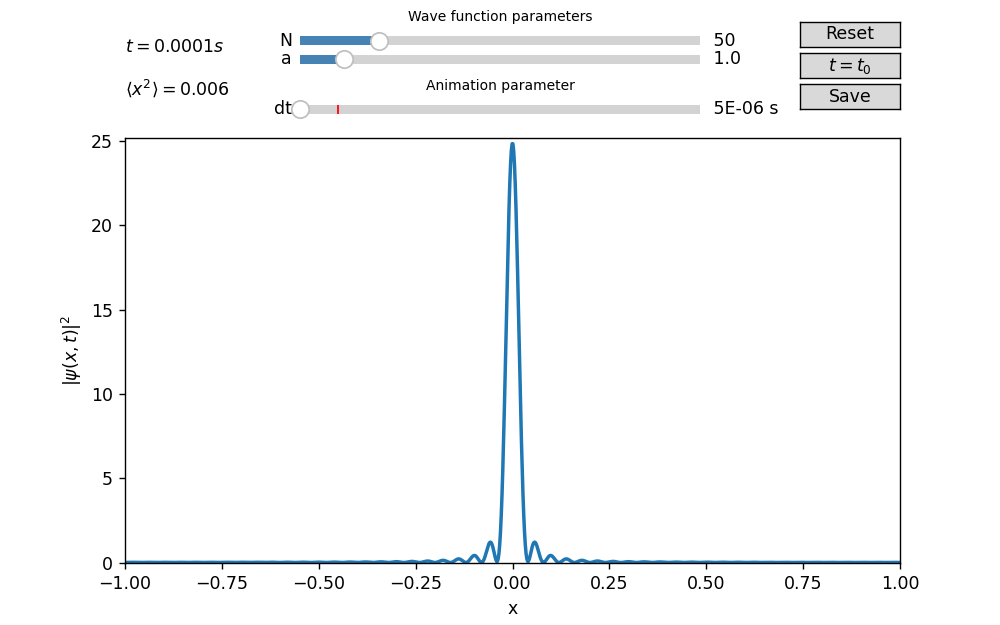

In [5]:
import numpy as np
from numpy import pi, sin, cos, exp, sqrt, log
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#We activate the interactive mode in order to display animations
%matplotlib notebook

#We define the time dependent wave function
def Psi2(X,t):
    Psi2 = sum(sin(n*pi/2)/sqrt(a)*sin(n*pi*(X+a)/(2*a))*exp(-I*(n*pi/a)**2/8*t) for n in range(N+1))*sqrt(2/N)
    return Psi2

#Program constants
I = complex(0,1)


# -----------------------------------------------------------------------------------------------

def find_lims(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of Y
    ymax = np.max(Y)
    ymin = np.min(Y)
    
    if(ymax >= 0 and ymin >= 0):
        lim_inf, lim_sup = ymin*0.8, ymax*1.01
    elif(ymax > 0 and ymin < 0):
        lim_inf, lim_sup = ymin*1.2, ymax*1.01
    elif(ymax < 0 and ymin < 0):
        lim_inf, lim_sup = ymin*1.2, ymax*0.8
    
    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_rhox_2D(Psi,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_N = fig.add_axes([0.3, 0.92, 0.4, 0.03])
        ax_N.set_title('Wave function parameters',fontsize=8)
        ax_a = fig.add_axes([0.3, 0.89, 0.4, 0.03])
        
        ax_dt = fig.add_axes([0.3, 0.81, 0.4, 0.03])
        ax_dt.set_title('Animation parameter',fontsize=8)
        
        #We create the sliders as widgets
        #The initial values are the ones preset in the maoi
        s_N = Slider(ax=ax_N, label='N', valmin=1, valmax=250, valinit=N, valstep = 1, valfmt=' %0.0f',facecolor='steelblue')
        s_a = Slider(ax=ax_a, label='a', valmin=0.5, valmax=5, valinit=a, valfmt=' %1.1f ', facecolor='steelblue')
        s_dt = Slider(ax=ax_dt,label='dt',valmin=0.000005,valmax=0.001,valinit=dt,valfmt=' %.E s',facecolor='orange')    
        
        #We return all axes and sliders created in the function
        return ax_N, ax_a, ax_dt, s_N, s_a, s_dt
    
    def make_annotations():
    #This function defines and specifies the details of the annotations needed in this interactive plot
    #Any details referring the definition and graphic details of the annotations must be changed inside this function
        X = np.linspace(x0,xf,1000)
        x2 = sum(X**2*np.abs(Psi(X,t))**2)*(X[1]-X[0])
        
        time_annotation = ax.annotate("$t = {:10.4f} s $".format(t), xy=(0, 1.20), xycoords="axes fraction")
        x2_annotation=ax.annotate("$⟨x^2⟩ = {:10.3f} $".format(x2), xy=(0, 1.10), xycoords="axes fraction")

        
        #We return all annotations created in the function
        return time_annotation, x2_annotation
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.8,0.925,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            global t
            t = t0
            
            s_N.reset()
            s_a.reset()
            s_dt.reset()
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        #We create an axis for the reset button and define its widget
        ax_restart = fig.add_axes([0.8,0.875,0.1,0.04])
        b_restart = Button(ax_restart, '$t = t_0$', hovercolor='0.975')
        
        def restart(event):
        #Resets all sliders and time
            global t
            t = t0 - dt
            return
        #We call the reset function when the reset button is used
        b_restart.on_clicked(restart)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.825,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Parabolic_wavefun_animated_rhox.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_restart, b_save
        
        
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0
        
#       We add some graphic details
        ax.set_xlabel('x')
        ax.set_ylabel('$|ψ(x,t)|^2$')
        ax.axhline(y = 0,color = 'black',linestyle = '--',lw = 0.5)
        
#       We compute the initial information
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t0)
        
#       We use the initial function limits
        ymin, ymax = find_lims(np.abs(Y)**2)
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
#       We represent both functions
        line1.set_data(X, np.abs(Y)**2)
    
        #We return all line functions
        return line1
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame
        global t,X,Y
        t = t + dt
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t)

#       We actualize the time and x2 annotations
        time_annotation.set_text("$t = {:10.4f} s $".format(t))
        x2 = sum(X**2*np.abs(Psi(X,t))**2)*(X[1]-X[0])        
        x2_annotation.set_text("$⟨x^2⟩ = {:10.3f} $".format(x2))

#       We represent both functions
        line1.set_data(X, np.abs(Y)**2)
        
        #We return all line functions
        return line1
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global N,k,a,x0,xf,ymin,ymax,dt
        N = round(s_N.val)
        a = s_a.val
        dt = s_dt.val
        
        x0 = -a
        xf = a

        #We compute and apply the new limits in the main figure
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t0)
        ymin, ymax = find_lims(np.abs(Y)**2)
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
        plt.show()
        return
    
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global N,a,x0,xf,t,dt
    N = 50
    a = 1

    #We initialize figure's variables
    t = t0
    dt = 0.0001
    x0 = -a
    xf = a
    
    #We define figure's axes and main line
    fig, ax = plt.subplots(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.1, top = 0.78)
    line1, = ax.plot([], [], lw=2, label = '$|ψ(x,t)|^2$')
    
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
    
    #We create the desired sliders
    ax_N, ax_a, ax_dt, s_N, s_a, s_dt = create_sliders()
    
    #We generate the two buttons
    b_reset, b_restart, b_save = generate_buttons()   
    
    #We generate the annotations
    time_annotation, x2_annotation = make_annotations()
    
    #We call the update function when any slider is used
    s_N.on_changed(update)
    s_a.on_changed(update)
    s_dt.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_restart, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_restart, b_save = animate_interactive_rhox_2D(Psi2,t0,total_frames)

## 2D representation of $ψ(x,t)$
In the following figure we can see the evolution of the real and imaginary parts of the time dependent wave function, using a finite sum of N eigenfunctions to approximate $\Psi$ in the case where  $\Delta x \rightarrow 0$ for $t = 0$.

<IPython.core.display.Javascript object>


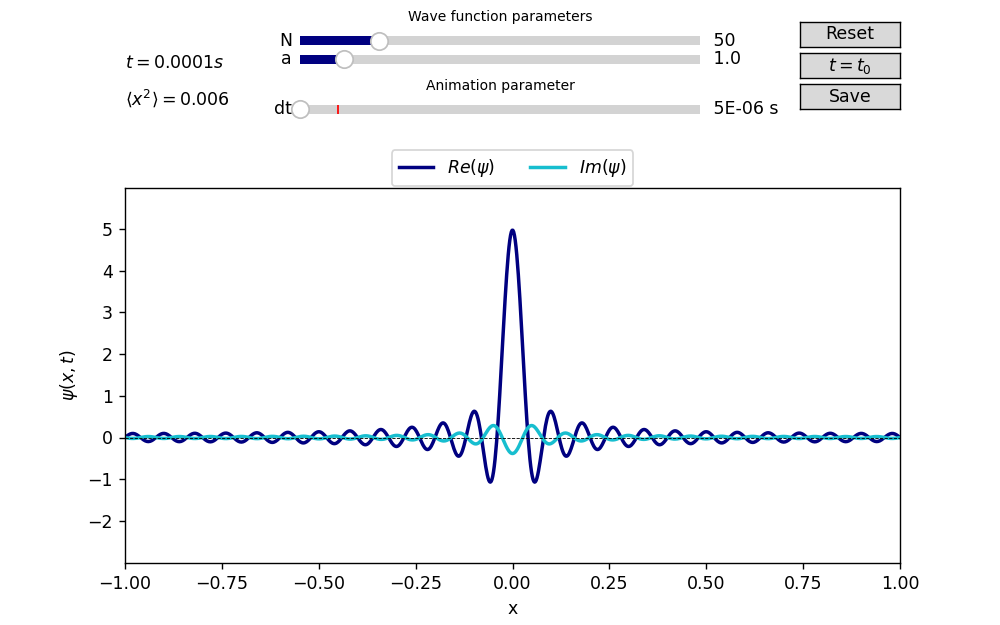

In [17]:
#We enable the interactive mode for the next plot
%matplotlib notebook

# -----------------------------------------------------------------------------------------------

def find_lims_abs(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of the imaginary and real part of Y (wavefunction array)
    ymax = np.max(Y)
    ymin = -ymax/2
    lim_inf, lim_sup = ymin*1.2, ymax*1.2

    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_Psi_2D(Psi,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_N = fig.add_axes([0.3, 0.92, 0.4, 0.03])
        ax_N.set_title('Wave function parameters',fontsize=8)
        ax_a = fig.add_axes([0.3, 0.89, 0.4, 0.03])
        
        ax_dt = fig.add_axes([0.3, 0.81, 0.4, 0.03])
        ax_dt.set_title('Animation parameter',fontsize=8)
        
        #We create the sliders as widgets
        #The initial values are the ones preset in the maoi
        s_N = Slider(ax=ax_N, label='N', valmin=1, valmax=250, valinit=N, valstep = 1, valfmt=' %0.0f',facecolor='navy')
        s_a = Slider(ax=ax_a, label='a', valmin=0.5, valmax=5, valinit=a, valfmt=' %1.1f ', facecolor='navy')
        s_dt = Slider(ax=ax_dt,label='dt',valmin=0.000005,valmax=0.001,valinit=dt,valfmt=' %.E s',facecolor='orange')    
        
        #We return all axes and sliders created in the function
        return ax_N, ax_a, ax_dt, s_N, s_a, s_dt
    
    def make_annotations():
    #This function defines and specifies the details of the annotations needed in this interactive plot
    #Any details referring the definition and graphic details of the annotations must be changed inside this function
        X = np.linspace(x0,xf,1000)
        x2 = sum(X**2*np.abs(Psi(X,t))**2)*(X[1]-X[0])
        
        time_annotation = ax.annotate("$t = {:10.4f} s $".format(t), xy=(0, 1.32), xycoords="axes fraction")
        x2_annotation=ax.annotate("$⟨x^2⟩ = {:10.3f} $".format(x2), xy=(0, 1.22), xycoords="axes fraction")

        
        #We return all annotations created in the function
        return time_annotation, x2_annotation
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.8,0.925,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            global t
            t = t0
            
            s_N.reset()
            s_a.reset()
            s_dt.reset()
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        #We create an axis for the reset button and define its widget
        ax_restart = fig.add_axes([0.8,0.875,0.1,0.04])
        b_restart = Button(ax_restart, '$t = t_0$', hovercolor='0.975')
        
        def restart(event):
        #Resets all sliders and time
            global t
            t = t0 - dt
            return
        #We call the reset function when the reset button is used
        b_restart.on_clicked(restart)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.825,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Parabolic_wavefun_animated_rhox.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_restart, b_save
    
    
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0
        
#       We add some graphic details
        ax.set_xlabel('x')
        ax.set_ylabel('$ψ(x,t)$')
        ax.legend(bbox_to_anchor=(0., 1.02, 1.,.102),loc = 'upper center',ncol=2)
        ax.axhline(y = 0,color = 'black',linestyle = '--',lw = 0.5)
        
#       We compute the initial information
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t0)
        
#       We use the initial function limits
        ymin, ymax = find_lims_abs(np.abs(Y))
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
#       We represent both functions
        line1.set_data(X, np.real(Y))
        line2.set_data(X, np.imag(Y))  
        
        #We return all line functions
        return line1, line2
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame
        global t,X,Y
        t = t + dt
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t)

#       We actualize the time and x2 annotations
        time_annotation.set_text("$t = {:10.4f} s $".format(t))
        x2 = sum(X**2*np.abs(Psi(X,t))**2)*(X[1]-X[0])        
        x2_annotation.set_text("$⟨x^2⟩ = {:10.3f} $".format(x2))

#       We represent both functions
        line1.set_data(X, np.real(Y))
        line2.set_data(X, np.imag(Y))      
        
        #We return all line functions
        return line1, line2
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global N,k,a,x0,xf,ymin,ymax,dt
        N = round(s_N.val)
        a = s_a.val
        dt = s_dt.val
        
        x0 = -a
        xf = a

        #We compute and apply the new limits in the main figure
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t0)
        ymin, ymax = find_lims_abs(np.abs(Y))
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
        #We actualize the annotations
        time_annotation, x2_annotation, E_annotation, DE_annotation = make_annotations(actualize=True)
        
        plt.show()
        return
    
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global N,a,x0,xf,t,dt
    N = 50
    a = 1

    #We initialize figure's variables
    t = t0
    dt = 0.0001
    x0 = -a
    xf = a
    
    #We define figure's axes and main line
    fig, ax = plt.subplots(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.1, top = 0.70)
    line1, = ax.plot([], [], lw=2, label = '$Re(ψ)$', color = 'navy')
    line2, = ax.plot([], [], lw=2, label = '$Im(ψ)$', color = 'tab:cyan')    
    
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
    
    #We create the desired sliders
    ax_N, ax_a, ax_dt, s_N, s_a, s_dt = create_sliders()
    
    #We generate the two buttons
    b_reset, b_restart, b_save = generate_buttons()   
    
    #We generate the annotations
    time_annotation, x2_annotation = make_annotations()
    
    #We call the update function when any slider is used
    s_N.on_changed(update)
    s_a.on_changed(update)
    s_dt.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_restart, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_restart, b_save = animate_interactive_Psi_2D(Psi2,t0,total_frames)